In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
sns.set()

# 支持中文
# 就是那个文件的文件名，记得对照大小写
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

%matplotlib inline

朴素贝叶斯的原理比较简单，带入公式计算即可。

##  连续值

### 数据

In [3]:
from sklearn import datasets

In [4]:
iris = datasets.load_iris()
data = iris.data # 只包括样本的特征，150x4
y = iris.target # 样本的类型，[0, 1, 2]
features = iris.feature_names  # 4个特征的名称
targets = iris.target_names  # 3类鸢尾花的名称，跟y中的3个数字对应

In [5]:
df = pd.DataFrame(data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
df["label"] = y
df["target"] = df["label"].map(lambda x: targets[x])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label,target
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
df["target"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: target, dtype: int64

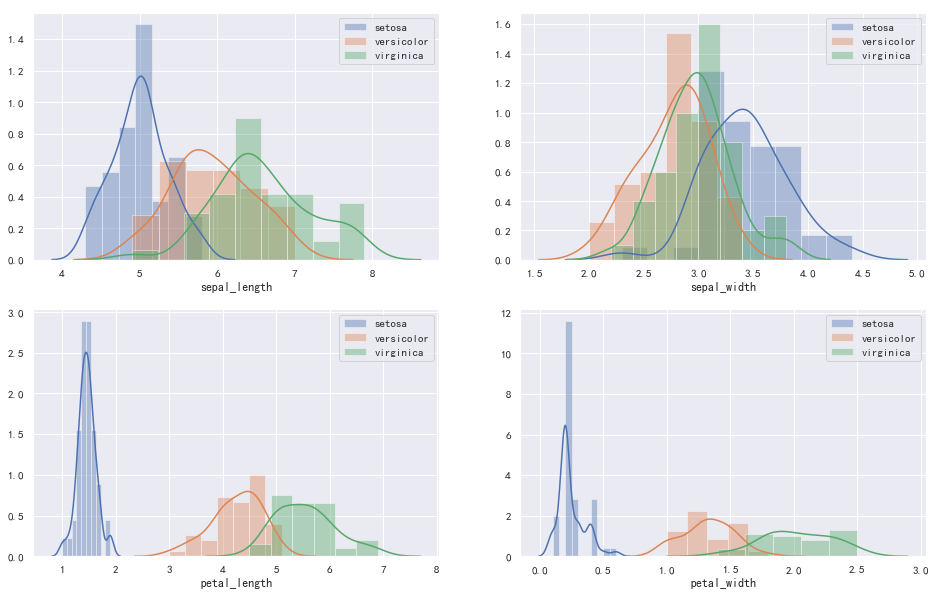

In [7]:
# 看看所有属性的分布，明显是符合高斯分布的
fig, axs =plt.subplots(2,2,figsize=(16,10))

columns = [['sepal_length', 'sepal_width'],['petal_length', 'petal_width']]

for row_index,row in enumerate(columns):
    for col_index,col in enumerate(row):
        ax = axs[row_index, col_index]
        sns.distplot(df[col][df["target"]=="setosa"], ax=ax)
        sns.distplot(df[col][df["target"]=="versicolor"], ax=ax)
        sns.distplot(df[col][df["target"]=="virginica"], ax=ax)
        ax.legend(['setosa', 'versicolor', 'virginica'])

### 划分train, test
保证每次分的数据都一样。

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# 设置random_state，保证每次数据一样
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)
X_train[:5], y_train[:5]

(array([[6.4, 3.1, 5.5, 1.8],
        [5.4, 3. , 4.5, 1.5],
        [5.2, 3.5, 1.5, 0.2],
        [6.1, 3. , 4.9, 1.8],
        [6.4, 2.8, 5.6, 2.2]]), array([2, 1, 0, 2, 2]))

In [10]:
pd.Series(y_train).value_counts()

2    44
0    39
1    37
dtype: int64

### 使用sklearn的GaussianNB

In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
# 1/3 = 0.3333333333333333
# priors先验概率，这个我们已经知道了，根据总的数据集。怕划分的测试集不均衡。
gs_nb = GaussianNB(priors=[1/3, 1/3, 1/3])
gs_nb.fit(X_train, y_train)
gs_nb.score(X_test,y_test)

0.9666666666666667

In [13]:
# 返回概率
gs_nb.predict_proba(X_test)[0:5]

array([[1.84326961e-232, 2.60287765e-006, 9.99997397e-001],
       [1.73274264e-082, 9.99998574e-001, 1.42633685e-006],
       [1.00000000e+000, 7.48642430e-019, 3.23921414e-028],
       [1.78829798e-305, 1.24447458e-006, 9.99998756e-001],
       [1.00000000e+000, 9.05610204e-017, 3.74186718e-027]])

In [14]:
gs_nb.predict_proba(X_test).argmax(axis=1), gs_nb.predict(X_test)

(array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
        0, 0, 2, 0, 0, 1, 1, 0], dtype=int64),
 array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
        0, 0, 2, 0, 0, 1, 1, 0]))

In [15]:
gs_nb.predict(X_test), y_test

(array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
        0, 0, 2, 0, 0, 1, 1, 0]),
 array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
        0, 0, 2, 0, 0, 1, 1, 0]))

In [16]:
# 随机划分的测试集概率差不多
gs_nb = GaussianNB()
gs_nb.fit(X_train, y_train)
gs_nb.score(X_test,y_test)

0.9666666666666667

In [17]:
# 和knn的结果一样，后两个特征更容易区分
gs_nb = GaussianNB(priors=[1/3, 1/3, 1/3])
gs_nb.fit(X_train[:,2:], y_train)
gs_nb.score(X_test[:,2:],y_test)

1.0

In [18]:
gs_nb = GaussianNB()
gs_nb.fit(X_train[:,2:], y_train)
gs_nb.score(X_test[:,2:],y_test)

1.0

In [19]:
# 前两个特征相对不是很重要
gs_nb = GaussianNB()
gs_nb.fit(X_train[:,:2], y_train)
gs_nb.score(X_test[:,:2],y_test)

0.7333333333333333

### 手动实现

自己根据概率公式计算一下。

In [20]:
# 这个求的整体的
X_train.mean(axis=0), X_train.std(axis=0)

(array([5.88083333, 3.05333333, 3.81583333, 1.23166667]),
 array([0.84688604, 0.43010335, 1.77745116, 0.7721165 ]))

In [21]:
# 分母：P(x1,x2,x3,x4)，分子：P(Y)*P(x1|Y)*P(x2|Y)*P(x3|Y)*P(x3|Y)
# 分母一样其实求不求都行


In [22]:
# 应该是需要每个类别的
probs = []
for i in [0,1,2]:
    mask = y_train == i
    X_label = X_train[mask]
    u, r = X_label.mean(axis=0), X_label.std(axis=0)
    
    x_probs = 1/np.sqrt(2*np.pi)/r * (np.exp( -(X_test - u)**2/(2*r**2) ))    
    prob = x_probs.prod(axis=1) / (3 * 3)
    probs.append(prob.reshape(-1, 1))

In [23]:
np.hstack(probs)[:5]

array([[1.52566019e-234, 2.15461640e-008, 8.27781139e-003],
       [1.61376330e-084, 9.31363035e-003, 1.32843877e-008],
       [5.09587561e-002, 3.81498178e-020, 1.65066011e-029],
       [2.58779766e-307, 1.80106253e-008, 1.44724603e-002],
       [1.23335849e+000, 1.11694020e-016, 4.61505538e-027]])

In [24]:
np.hstack(probs).argmax(axis=1), y_test

(array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
        0, 0, 2, 0, 0, 1, 1, 0], dtype=int64),
 array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
        0, 0, 2, 0, 0, 1, 1, 0]))

In [25]:
np.hstack(probs).argmax(axis=1) == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [26]:
(np.hstack(probs).argmax(axis=1) == y_test).mean()

0.9666666666666667

In [27]:
# 概率就是这么算的，和sklearn差的比例是一样的。
# 分母：P(x1,x2,x3,x4)，分子：P(Y)*P(x1|Y)*P(x2|Y)*P(x3|Y)*P(x3|Y)

probs = []

u, r = X_train.mean(axis=0), X_train.std(axis=0)
# 特征独立假设，整体假设也是正态分布
# 分母：P(x1,x2,x3,x4) = P(x1)*P(x2)*P(x3)*P(x4)
p = ( 1/np.sqrt(2*np.pi)/r * (np.exp( -(X_test - u)**2/(2*r**2) )) ).prod(axis=1)

for i in [0,1,2]:
    mask = y_train == i
    X_label = X_train[mask]
    u, r = X_label.mean(axis=0), X_label.std(axis=0)    
    x_probs = 1/np.sqrt(2*np.pi)/r * (np.exp( -(X_test - u)**2/(2*r**2) ))
    prob = x_probs.prod(axis=1) / (3 * 3) / p
    probs.append(prob.reshape(-1, 1))
    
probs = np.hstack(probs)
probs[:5]

array([[1.46738183e-232, 2.07231269e-006, 7.96160912e-001],
       [2.42114554e-082, 1.39733346e+000, 1.99307023e-006],
       [2.39109035e+002, 1.79006845e-016, 7.74523903e-026],
       [7.71517073e-305, 5.36962573e-006, 4.31476941e+000],
       [3.30059106e+002, 2.98904402e-014, 1.23503512e-024]])

```
[[1.84326961e-232, 2.60287765e-006, 9.99997397e-001],
[1.73274264e-082, 9.99998574e-001, 1.42633685e-006],
[1.00000000e+000, 7.48642430e-019, 3.23921414e-028],
[1.78829798e-305, 1.24447458e-006, 9.99998756e-001],
[1.00000000e+000, 9.05610204e-017, 3.74186718e-027]]
```

In [28]:
# 分母：P(x1,x2,x3,x4)，分子：P(Y)*P(x1|Y)*P(x2|Y)*P(x3|Y)*P(x3|Y)

probs = []

ps = []
for i in [0,1,2]:
    mask = y_train == i
    X_label = X_train[mask]
    u, r = X_label.mean(axis=0), X_label.std(axis=0)
    # 全概率公式+条件特征独立假设
    p = ( 1/np.sqrt(2*np.pi)/r * (np.exp( -(X_test - u)**2/(2*r**2) )) ).prod(axis=1)
    ps.append(p.reshape(-1, 1))

# 全概率公式
# 分母：P(x1,x2,x3,x4) = P(x1,x2,x3,x4|Y=0) + P(x1,x2,x3,x4|Y=1) + P(x1,x2,x3,x4|Y=2)
p = np.hstack(ps).sum(axis=1)

for i in [0,1,2]:
    mask = y_train == i
    X_label = X_train[mask]
    u, r = X_label.mean(axis=0), X_label.std(axis=0)    
    x_probs = 1/np.sqrt(2*np.pi)/r * (np.exp( -(X_test - u)**2/(2*r**2) ))
    prob = x_probs.prod(axis=1) / (3 * 3) / p
    probs.append(prob.reshape(-1, 1))
    
probs = np.hstack(probs)
probs[:5]

array([[2.04785237e-233, 2.89208327e-007, 1.11110822e-001],
       [1.92520823e-083, 1.11110953e-001, 1.58481807e-007],
       [1.11111111e-001, 8.31823414e-020, 3.59912001e-029],
       [1.98675768e-306, 1.38274907e-007, 1.11110973e-001],
       [1.11111111e-001, 1.00623190e-017, 4.15762273e-028]])

In [29]:
(probs.argmax(axis=1) == y_test).mean()

0.9666666666666667

**其实根本没必要管分母的**

In [30]:
probs_df = pd.DataFrame(probs)
probs_df[["0_", "1_", "2_"]] = np.rint( probs_df.div(probs_df.max(axis=1), axis=0) * 100 )
probs_df["y"] = y_test
probs_df["y_"] = probs.argmax(axis=1)
probs_df["accurate"] = probs_df["y"] == probs_df["y_"]
probs_df["第一第二之差"] =  probs_df[["0_", "1_", "2_"]].apply(
    lambda row: row.sort_values(ascending=False)[0] - row.sort_values(ascending=False)[1], axis=1)
probs_df

,0,1,2,0_,1_,2_,y,y_,accurate,第一第二之差
0,2.047852e-233,2.892083e-07,1.111108e-01,0.0,0.0,100.0,2,2,True,100.0
1,1.925208e-83,1.111110e-01,1.584818e-07,0.0,100.0,0.0,1,1,True,100.0
2,1.111111e-01,8.318234e-20,3.599120e-29,100.0,0.0,0.0,0,0,True,100.0
3,1.986758e-306,1.382749e-07,1.111110e-01,0.0,0.0,100.0,2,2,True,100.0
4,1.111111e-01,1.006232e-17,4.157623e-28,100.0,0.0,0.0,0,0,True,100.0
5,8.300303e-322,2.067209e-11,1.111111e-01,0.0,0.0,100.0,2,2,True,100.0
6,1.111111e-01,1.285913e-17,5.222412e-28,100.0,0.0,0.0,0,0,True,100.0
7,1.368055e-147,8.921265e-02,2.189846e-02,0.0,100.0,25.0,1,1,True,75.0
8,5.716557e-151,1.023456e-01,8.765508e-03,0.0,100.0,9.0,1,1,True,91.0
9,5.979561e-94,1.111001e-01,1.101528e-05,0.0,100.0,0.0,1,1,True,100.0


In [31]:
probs_df.sort_values("第一第二之差")

,0,1,2,0_,1_,2_,y,y_,accurate,第一第二之差
10,2.718961e-211,6.360542e-02,4.750569e-02,0.0,100.0,75.0,2,1,False,25.0
24,2.952681e-169,2.343475e-02,8.767636e-02,0.0,27.0,100.0,2,2,True,73.0
7,1.368055e-147,8.921265e-02,2.189846e-02,0.0,100.0,25.0,1,1,True,75.0
8,5.716557e-151,1.023456e-01,8.765508e-03,0.0,100.0,9.0,1,1,True,91.0
11,8.636844e-133,1.058092e-01,5.301942e-03,0.0,100.0,5.0,1,1,True,95.0
13,1.322853e-140,1.063866e-01,4.724496e-03,0.0,100.0,4.0,1,1,True,96.0
20,2.323222e-187,2.199220e-03,1.089119e-01,0.0,2.0,100.0,2,2,True,98.0
21,9.318834e-131,1.104336e-01,6.775039e-04,0.0,100.0,1.0,1,1,True,99.0
14,4.311263e-141,1.099919e-01,1.119242e-03,0.0,100.0,1.0,1,1,True,99.0
16,4.430902e-132,1.099826e-01,1.128517e-03,0.0,100.0,1.0,1,1,True,99.0


有时候为了提高精确率，我们可以比较各个类别概率的比值，取阈值比较大，比较有把握判断是某种类别的时候再判断。

和逻辑回归中调整概率的阈值是一个道理。

In [32]:
from scipy import stats

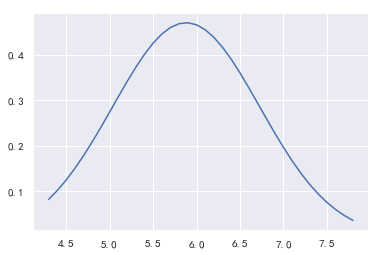

In [33]:
x = np.arange(X_train[:,0].min(), X_train[:,0].max(), 0.1)
plt.plot(x, stats.norm(X_train.mean(axis=0)[0], X_train.std(axis=0)[0]).pdf(x))

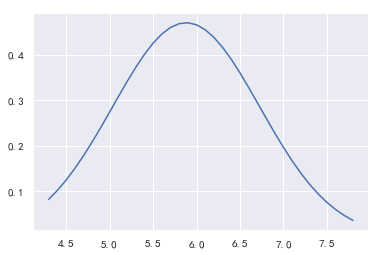

In [34]:
x = np.arange(X_train[:,0].min(), X_train[:,0].max(), 0.1)
u,r = X_train.mean(axis=0)[0], X_train.std(axis=0)[0]
plt.plot(x, 1/np.sqrt(2*np.pi)/r * (np.exp( -(x - u)**2/(2*r**2) )) )

In [35]:
y_test == i

array([ True, False, False,  True, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False])

## 离散值

对短信进行二分类，数据为SMSSpamCollection

In [36]:
sms_df = pd.read_csv("data/SMSSpamCollection", sep="\t", header=None, names=['target','message'])
sms_df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
sms_df.shape, sms_df["message"].unique().size

((5572, 2), 5169)

In [38]:
# spam垃圾邮件
sms_df["target"].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [39]:
X, y = sms_df["message"].values, sms_df["target"].values

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [41]:
# 文本特征提取：
#     将文本数据转化成特征向量的过程
#     比较常用的文本特征表示法为词袋法
#
# 词袋法：
#     不考虑词语出现的顺序，每个出现过的词汇单独作为一列特征
#     这些不重复的特征词汇集合为词表
#     每一个文本都可以在很长的词表上统计出一个很多列的特征向量
# CountVectorizer是将文本向量转换成稀疏表示数值向量（字符频率向量）  vectorizer 将文档词块化,只考虑词汇在文本中出现的频率
# 词袋
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
vectorizer = CountVectorizer(stop_words='english')
# 每行的词向量，fea_train是一个sparse矩阵
fea_train = vectorizer.fit_transform(X_train)
fea_train

<4457x7457 sparse matrix of type '<class 'numpy.int64'>'
	with 34675 stored elements in Compressed Sparse Row format>

In [43]:
fea_test = vectorizer.transform(X_test)
fea_test

<1115x7457 sparse matrix of type '<class 'numpy.int64'>'
	with 7873 stored elements in Compressed Sparse Row format>

In [44]:
# vocabulary=vectorizer.vocabulary_ 只计算上面vectorizer中单词的tf(term frequency 词频)
# 和上面的效果一样
vectorizer2 = CountVectorizer(vocabulary=vectorizer.vocabulary_)
(vectorizer2.fit_transform(X_test) != fea_test).sum()

0

In [45]:
# 很稀疏
print(fea_train[:3])

  (0, 4349)	1
  (0, 2356)	1
  (0, 6698)	1
  (0, 5898)	1
  (0, 2722)	1
  (0, 3825)	1
  (0, 3792)	1
  (0, 3324)	1
  (1, 4346)	1
  (1, 1861)	1
  (1, 3368)	1
  (2, 4270)	1
  (2, 6218)	1
  (2, 6600)	1
  (2, 5675)	1
  (2, 3028)	1
  (2, 3188)	1


In [46]:
from sklearn.naive_bayes import MultinomialNB

In [47]:
# 词袋法矩阵的值都是0、1，应该适用于多项分布、伯努利分布
# alpha = 1 拉普拉斯估计给每个单词个数加1
mul_nb = MultinomialNB(alpha=1)
mul_nb.fit(fea_train, y_train)
mul_nb.score(fea_test, y_test)

0.9910313901345291

In [48]:
pd.crosstab(mul_nb.predict(fea_test), y_test)

col_0,ham,spam
row_0,,
ham,965,7
spam,3,140


In [49]:
from sklearn.naive_bayes import BernoulliNB

In [50]:
# 差一点点
bnl_nb = BernoulliNB(alpha=0.1)
bnl_nb.fit(fea_train, y_train)
bnl_nb.score(fea_test, y_test)

0.9928251121076234

In [51]:
# 高斯不支持sparse矩阵，也好理解，计算的方式不一样，这个是连续值
# 而且这个明显不适用于高斯分布
gs_nb = GaussianNB()
gs_nb.fit(fea_train.toarray(), y_train)
gs_nb.score(fea_test.toarray(), y_test)

0.8932735426008969

In [52]:
# 使用Tfidf应该更好
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
# Equivalent to CountVectorizer followed by TfidfTransformer.
# term frequency 词频，idf inverse documents frequency
# 相当于对词频，加了权重
# 的，了，你，我，他分类，作用不大，因为所有文章，都出现很多
# 作为分类的词，特点：一类文章中，出现次数很多，其他文章中出现很少
tfidf = TfidfVectorizer(stop_words='english')
tfidf_train = tfidf.fit_transform(X_train)
tfidf_train

<4457x7457 sparse matrix of type '<class 'numpy.float64'>'
	with 34675 stored elements in Compressed Sparse Row format>

In [54]:
tfidf_test = tfidf.transform(X_test)
tfidf_test

<1115x7457 sparse matrix of type '<class 'numpy.float64'>'
	with 7873 stored elements in Compressed Sparse Row format>

In [55]:
print(tfidf_train[:2])

  (0, 3324)	0.2638802854739516
  (0, 3792)	0.4750235197588447
  (0, 3825)	0.37729728742748087
  (0, 2722)	0.299459437576315
  (0, 5898)	0.415102954745324
  (0, 6698)	0.3616065178053154
  (0, 2356)	0.2545072203817634
  (0, 4349)	0.3238008504874723
  (1, 3368)	0.5510421389942982
  (1, 1861)	0.5163195438969705
  (1, 4346)	0.6555659308129219


In [56]:
print(fea_train[:2])

  (0, 4349)	1
  (0, 2356)	1
  (0, 6698)	1
  (0, 5898)	1
  (0, 2722)	1
  (0, 3825)	1
  (0, 3792)	1
  (0, 3324)	1
  (1, 4346)	1
  (1, 1861)	1
  (1, 3368)	1


In [57]:
# alpha = 1 拉普拉斯估计给每个单词个数加1
mul_nb = MultinomialNB(alpha=0.1)
mul_nb.fit(tfidf_train, y_train)
mul_nb.score(tfidf_test, y_test)

0.9919282511210762

In [58]:
pd.crosstab(mul_nb.predict(tfidf_test), y_test)

col_0,ham,spam
row_0,,
ham,966,7
spam,2,140


In [59]:
bnl_nb = BernoulliNB(alpha=0.05)
bnl_nb.fit(tfidf_train, y_train)
bnl_nb.score(tfidf_test, y_test)

0.9928251121076234

In [60]:
# 用tfidf也不适用于高斯分布
gs_nb = GaussianNB()
gs_nb.fit(tfidf_train.toarray(), y_train)
gs_nb.score(tfidf_test.toarray(), y_test)

0.8896860986547085